In [17]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import logging

In [2]:
dataset = fetch_california_housing()

In [4]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [9]:
df['Median House Value'] = dataset.target

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

In [16]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
mi = mutual_info_regression(x, y)

In [19]:
mi

array([0.38720836, 0.03358817, 0.10320848, 0.02386904, 0.02095158,
       0.07256182, 0.37174601, 0.40359335])

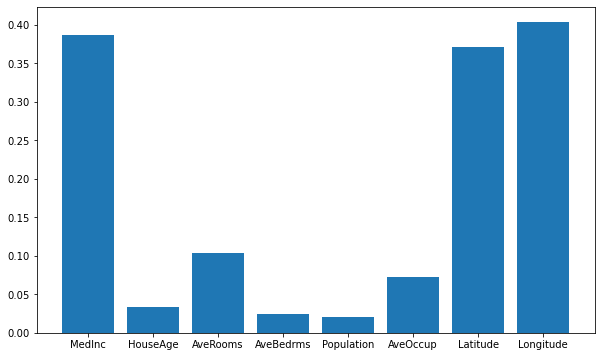

In [20]:
# Visualise Feature Selection
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi)
plt.show()

In [34]:
def select_precentile(x,y,percentile_value):
    select = SelectPercentile(mutual_info_regression,percentile=percentile_value)
    x_new = select.fit_transform(x,y)
    selected_features_mask = select.get_support()
    selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_features_mask[i]]
    return x_new,selected_feature_names

In [38]:
def linear_model():
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f'R2 Score is {r2_score(y_test,y_pred)}')

**Mutual Info Regression.**


In [39]:

x_new,selected_feature_names = select_precentile(x,y,50)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
print(f'For percentile 50 the features selected are {selected_feature_names}')
linear_model()


For percentile 50 the features selected are ['MedInc', 'AveRooms', 'Latitude', 'Longitude']
R2 Score is 0.5916830071221781


In [45]:
x_new,selected_feature_names = select_precentile(x,y,70)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
print(f'For percentile 70 the features selected are {selected_feature_names}')
linear_model()


For percentile 70 the features selected are ['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']
R2 Score is 0.5640451939437606


In [46]:
x_new,selected_feature_names = select_precentile(x,y,80)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
print(f'For percentile 80 the features selected are {selected_feature_names}')
linear_model()


For percentile 80 the features selected are ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']
R2 Score is 0.5908128761749314


**Pearson Correlation.**


In [75]:
dataset = fetch_california_housing()
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']
print(x.shape)

(20640, 8)


In [59]:
from sklearn.feature_selection import f_regression, SelectKBest
x_new = SelectKBest(f_regression, k=8).fit_transform(x, y)
print(x_new.shape)

(20640, 8)


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.601565836143781


In [85]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['Median House Value'] = dataset.target


In [86]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Median House Value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

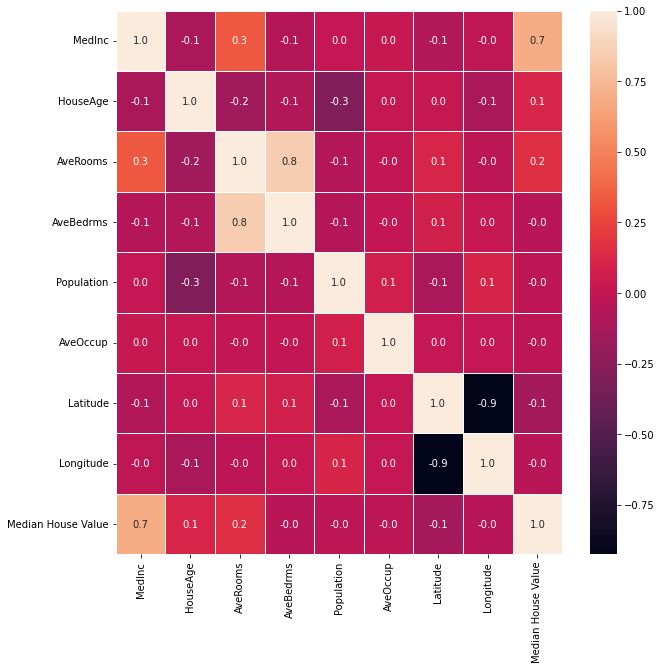

In [87]:
import seaborn as sns
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [88]:
df_copy = df

In [89]:
df_copy

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [90]:
df_copy.drop(['Latitude','Longitude',"AveRooms","AveBedrms"],axis=1,inplace=True)

In [91]:
x_new = df_copy[['MedInc','HouseAge','Population','AveOccup']]
y = df_copy['Median House Value']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.5141738061080832


**Wrapper Methods**

#### Recurive Feature Elimination (RFE)


In [103]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
dataset = fetch_california_housing()
X = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']
print(X.shape)

estimator = Lasso()
selector = RFE(estimator, n_features_to_select=5, step=1).fit(X, y)
print(selector.ranking_, )

(20640, 8)
[1 1 4 3 1 2 1 1]


In [104]:
X_new = selector.transform(X)
print(X_new.shape)

(20640, 5)


In [105]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.6027181807352664
